In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [15]:
import os
from os import listdir
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# List of folders/files
list(os.listdir("../input/osic-pulmonary-fibrosis-progression"))

['train.csv', 'train', 'test.csv', 'test', 'sample_submission.csv']

In [4]:
HOME_FOLDER = "../input/osic-pulmonary-fibrosis-progression/"

train = pd.read_csv(HOME_FOLDER+'train.csv')
test = pd.read_csv(HOME_FOLDER+'test.csv')

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

train.head(10)

Training data shape:  (1549, 7)
Testing data shape:  (5, 7)


,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker
5,ID00007637202177411956430,17,2101,52.868646,79,Male,Ex-smoker
6,ID00007637202177411956430,29,2000,50.327126,79,Male,Ex-smoker
7,ID00007637202177411956430,41,2064,51.937594,79,Male,Ex-smoker
8,ID00007637202177411956430,57,2057,51.761449,79,Male,Ex-smoker
9,ID00009637202177434476278,8,3660,85.282878,69,Male,Ex-smoker


In [6]:

train.isnull().sum()

Patient          0
Weeks            0
FVC              0
Percent          0
Age              0
Sex              0
SmokingStatus    0
dtype: int64

In [7]:
len(train['Patient'].unique())

176

Only 176 Unique Patients out 1549 records in Train

In [12]:
typeOfSmokers= train['SmokingStatus'].unique()
print(typeOfSmokers)

['Ex-smoker' 'Never smoked' 'Currently smokes']


# DATA VISUALIZATON

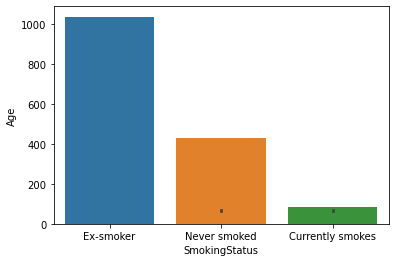

In [21]:
labels = typeOfSmokers
sizes = train['SmokingStatus'].value_counts()
#sns.barplot(x=labels, y=sizes, data=train)
sns.countplot(x='SmokingStatus',  data=train)


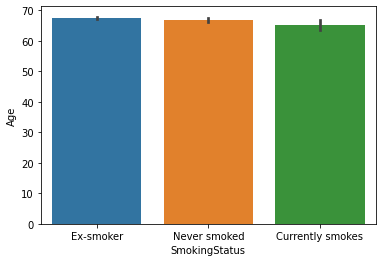

In [22]:
sns.barplot(x='SmokingStatus', y="Age", data=train)

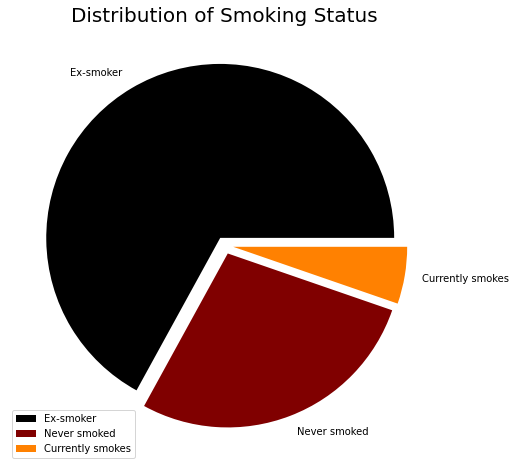

In [35]:

colors = plt.cm.afmhot(np.linspace(0, 1, 5))
explode = [0.05, 0.05, 0.05,]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(sizes, labels = labels, colors = colors, explode=explode, shadow = False)
plt.title('Distribution of Smoking Status', fontsize = 20)
plt.legend()
plt.show()


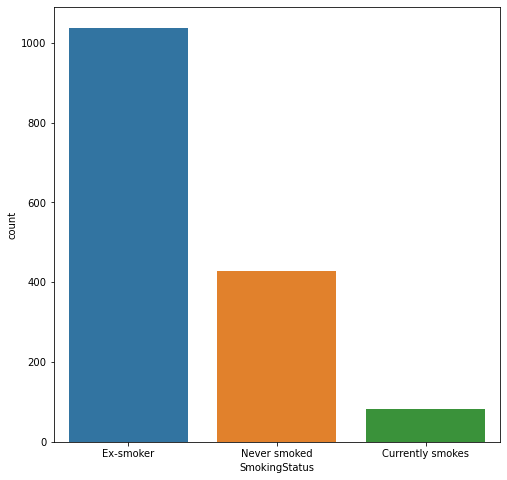